In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn.tree as tree
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
iris_data=pd.read_csv('iris-data.csv')
iris_data.head()

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0              5.1             3.5              1.4             0.2   
1              4.9             3.0              1.4             0.2   
2              4.7             3.2              1.3             0.2   
3              4.6             3.1              1.5             0.2   
4              5.0             3.6              1.4             0.2   

         class  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa

In [3]:
iris_data = pd.read_csv('iris-data.csv', na_values=['NA'])

In [4]:
iris_data.describe()

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
count       150.000000      150.000000       150.000000      145.000000
mean          5.644627        3.054667         3.758667        1.236552
std           1.312781        0.433123         1.764420        0.755058
min           0.055000        2.000000         1.000000        0.100000
25%           5.100000        2.800000         1.600000        0.400000
50%           5.700000        3.000000         4.350000        1.300000
75%           6.400000        3.300000         5.100000        1.800000
max           7.900000        4.400000         6.900000        2.500000

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarnin

''

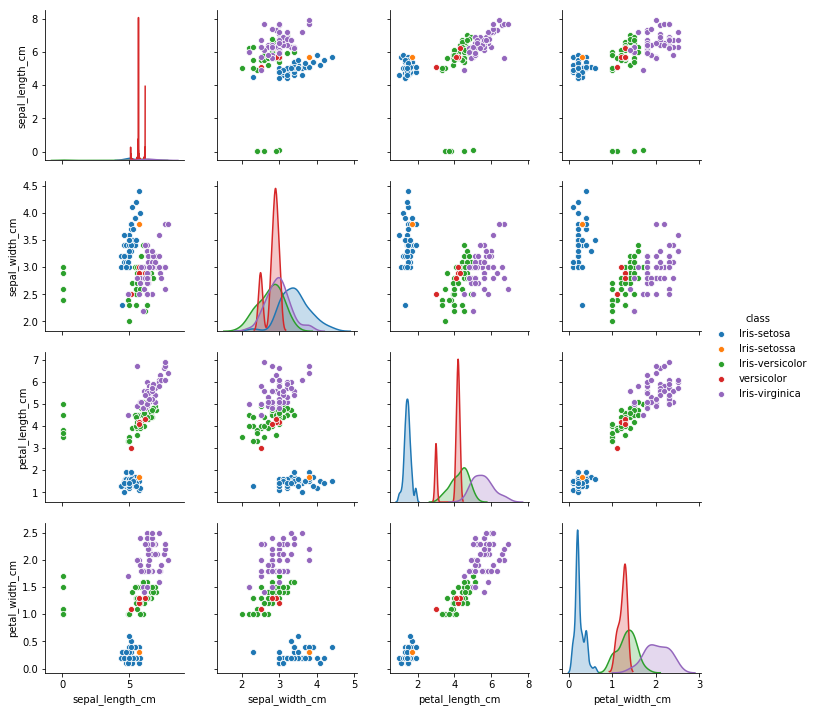

In [5]:
sb.pairplot(iris_data.dropna(),hue='class')
;

In [6]:
iris_data.loc[iris_data['class']=='versicolor','class']='Iris-versicolor'
iris_data.loc[iris_data['class']=='Iris-setossa','class']='Iris-setosa'
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

''

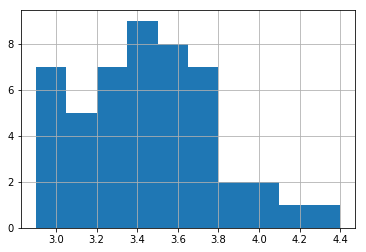

In [7]:
iris_data=iris_data.loc[(iris_data['class']!='Iris-setosa')|(iris_data['sepal_width_cm']>=2.5)]
iris_data.loc[iris_data['class']=='Iris-setosa','sepal_width_cm'].hist()
;

In [8]:
iris_data.loc[(iris_data['class']=='Iris-versicolor')&(iris_data['sepal_length_cm']<1.0)]

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
77            0.067             3.0              5.0             1.7   
78            0.060             2.9              4.5             1.5   
79            0.057             2.6              3.5             1.0   
80            0.055             2.4              3.8             1.1   
81            0.055             2.4              3.7             1.0   

              class  
77  Iris-versicolor  
78  Iris-versicolor  
79  Iris-versicolor  
80  Iris-versicolor  
81  Iris-versicolor

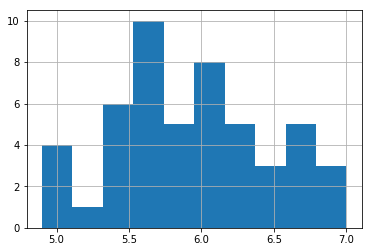

In [9]:
iris_data.loc[(iris_data['class']=='Iris-versicolor')&(iris_data['sepal_length_cm']<1.0),'sepal_length_cm']*=100.0
iris_data.loc[iris_data['class']=='Iris-versicolor','sepal_length_cm'].hist()

In [10]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull())|(iris_data['sepal_width_cm'].isnull())|(iris_data['petal_length_cm'].isnull())|(iris_data['petal_width_cm'].isnull())]

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
7               5.0             3.4              1.5             NaN   
8               4.4             2.9              1.4             NaN   
9               4.9             3.1              1.5             NaN   
10              5.4             3.7              1.5             NaN   
11              4.8             3.4              1.6             NaN   

          class  
7   Iris-setosa  
8   Iris-setosa  
9   Iris-setosa  
10  Iris-setosa  
11  Iris-setosa

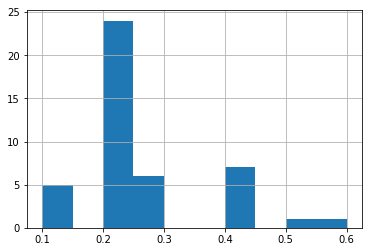

In [11]:
iris_data.loc[iris_data['class']=='Iris-setosa','petal_width_cm'].hist()

In [12]:
average_petal_width=iris_data.loc[iris_data['class']=='Iris-setosa','petal_width_cm'].mean()
iris_data.loc[(iris_data['class']=='Iris-setosa')&(iris_data['petal_width_cm'].isnull()),'petal_width_cm']=average_petal_width
iris_data.loc[(iris_data['class']=='Iris-setosa')&(iris_data['petal_width_cm']==average_petal_width)]

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
7               5.0             3.4              1.5            0.25   
8               4.4             2.9              1.4            0.25   
9               4.9             3.1              1.5            0.25   
10              5.4             3.7              1.5            0.25   
11              4.8             3.4              1.6            0.25   

          class  
7   Iris-setosa  
8   Iris-setosa  
9   Iris-setosa  
10  Iris-setosa  
11  Iris-setosa

In [13]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull())|(iris_data['sepal_width_cm'].isnull())|(iris_data['petal_length_cm'].isnull())|(iris_data['petal_width_cm'].isnull())]

Empty DataFrame
Columns: [sepal_length_cm, sepal_width_cm, petal_length_cm, petal_width_cm, class]
Index: []

In [14]:
iris_data.to_csv('iris-data-clean',index=False)
iris_data_clean=pd.read_csv('iris-data-clean.csv')

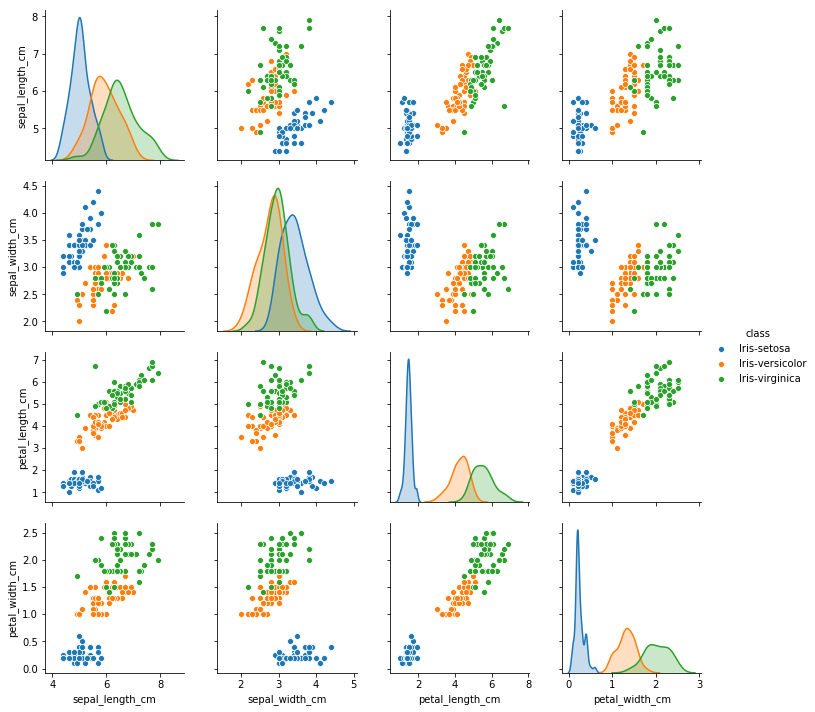

In [15]:
sb.pairplot(iris_data_clean,hue='class')

In [16]:
assert len(iris_data_clean['class'].unique())==3

In [17]:
assert iris_data_clean.loc[iris_data_clean['class']=='Iris-versicolor','sepal_length_cm'].min()>=2.5

In [18]:
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull())|(iris_data_clean['sepal_width_cm'].isnull())|(iris_data_clean['petal_length_cm'].isnull())|(iris_data_clean['petal_width_cm'].isnull())])==0

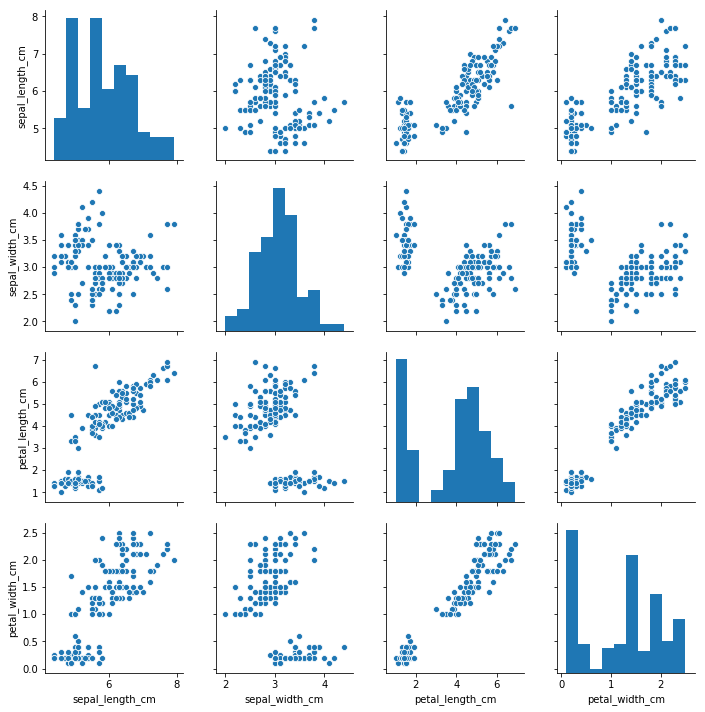

In [19]:
sb.pairplot(iris_data_clean)

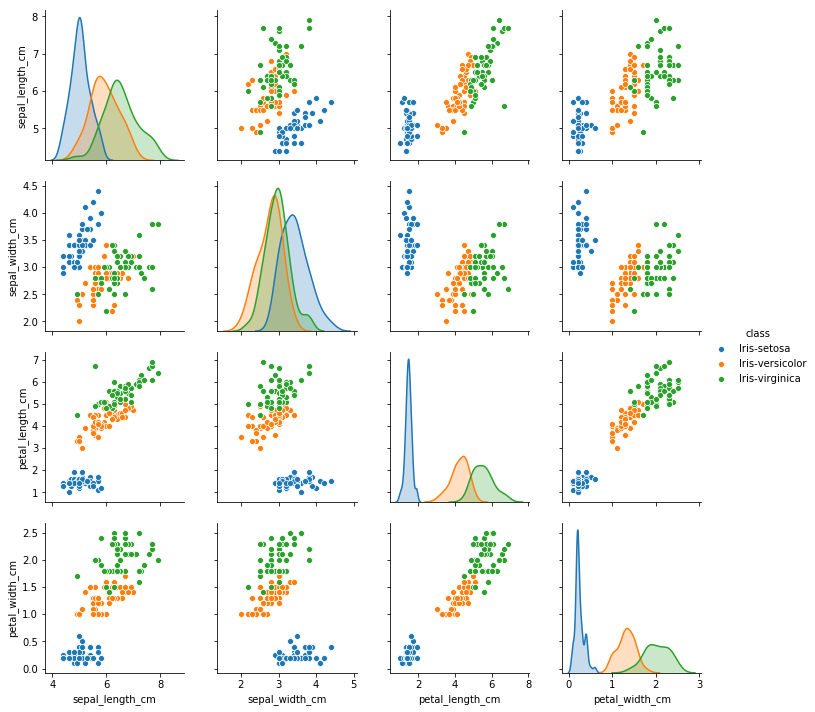

In [20]:
sb.pairplot(iris_data_clean,hue='class')

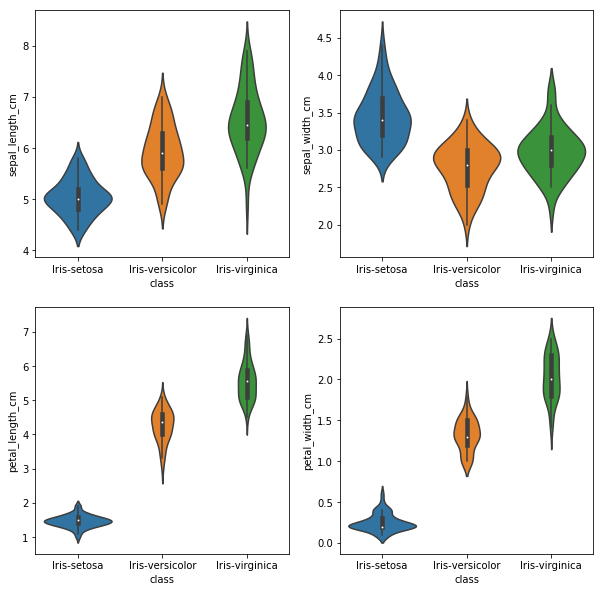

In [21]:
plt.figure(figsize=(10,10))
for column_index,column in enumerate(iris_data_clean.columns):
    if(column=='class'):
        continue
    plt.subplot(2,2,column_index+1)
    sb.violinplot(x='class',y=column,data=iris_data_clean)        

In [22]:
iris_data_clean=pd.read_csv('iris-data-clean.csv')
all_inputs=iris_data_clean[['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm']].values
all_labels=iris_data_clean['class'].values
all_inputs[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [23]:
(training_inputs,testing_inputs,training_classes,testing_classes)=train_test_split(all_inputs,all_labels,test_size=0.25,random_state=1)

In [24]:
decision_tree_classifier=DecisionTreeClassifier()
decision_tree_classifier.fit(training_inputs,training_classes)
decision_tree_classifier.score(testing_inputs,testing_classes)

0.9736842105263158

''

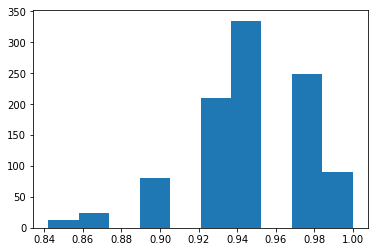

In [25]:
model_accuracies=[]
for repetition in range(1000):
    (training_inputs,testing_inputs,training_classes,testing_classes)=train_test_split(all_inputs,all_labels,test_size=0.25)
    decision_tree_classifier=DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs,training_classes)
    classifier_accuracy=decision_tree_classifier.score(testing_inputs,testing_classes)
    model_accuracies.append(classifier_accuracy)
plt.hist(model_accuracies)
;

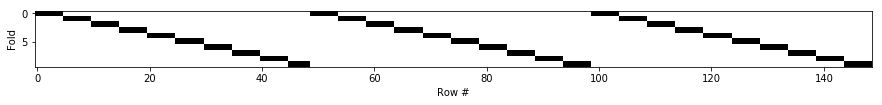

In [26]:
def plot_cv(cv,features,labels):
    masks=[]
    for train,test in cv.split(features,labels):
        mask=np.zeros(len(labels),dtype=bool)
        mask[test]=1
        masks.append(mask)
    plt.figure(figsize=(15,15))
    plt.imshow(masks,interpolation='none',cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10),all_inputs,all_labels)    

''

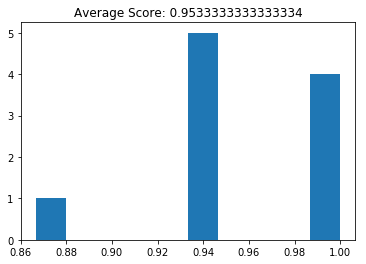

In [27]:
decision_tree_classifier=DecisionTreeClassifier()
cv_scores=cross_val_score(decision_tree_classifier,all_inputs,all_labels,cv=10)
plt.hist(cv_scores)
plt.title('Average Score: {}'.format(np.mean(cv_scores)))
;

''

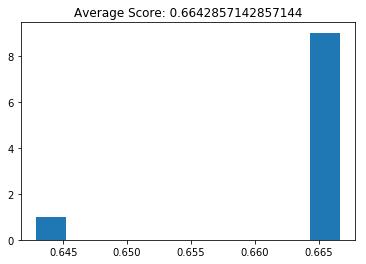

In [28]:
decision_tree_classifier=DecisionTreeClassifier(max_depth=1)
cv_scores=cross_val_score(decision_tree_classifier,all_inputs,all_labels,cv=10)
plt.hist(cv_scores)
plt.title('Average Score: {}'.format(np.mean(cv_scores)))
;

In [29]:
decision_tree_classifier=DecisionTreeClassifier()
parameter_grid={'max_depth':[1,2,3,4,5],'max_features':[1,2,3,4]}
cross_validation=StratifiedKFold(n_splits=10)
grid_search=GridSearchCV(decision_tree_classifier,param_grid=parameter_grid,cv=cross_validation)
grid_search.fit(all_inputs,all_labels)
print('Best Score: {}'.format(grid_search.best_score_))
print('Best Parameters: {}'.format(grid_search.best_params_))

Best Score: 0.9664429530201343
Best Parameters: {'max_depth': 3, 'max_features': 3}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


''

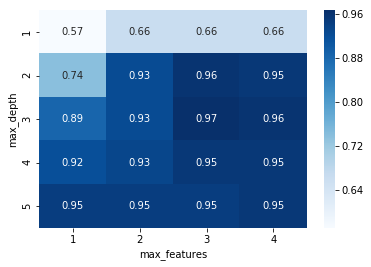

In [30]:
grid_visualization=grid_search.cv_results_['mean_test_score']
grid_visualization.shape=(5,4)
sb.heatmap(grid_visualization,cmap='Blues',annot=True)
plt.xticks(np.arange(4)+0.5,grid_search.param_grid['max_features'])
plt.yticks(np.arange(5)+0.5,grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')
;

In [31]:
decision_tree_classifier=DecisionTreeClassifier()
parameter_grid={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5],'max_features':[1,2,3,4]}
cross_validation=StratifiedKFold(n_splits=10)
grid_search=GridSearchCV(decision_tree_classifier,param_grid=parameter_grid,cv=cross_validation)
grid_search.fit(all_inputs,all_labels)
print('Best Score: {}'.format(grid_search.best_score_))
print('Best Parameters: {}'.format(grid_search.best_params_))

Best Score: 0.959731543624161
Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'max_features': 3, 'splitter': 'best'}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [32]:
decision_tree_classifier=grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [33]:
with open('iris_dtc.dot','w') as out_file:
    out_file=tree.export_graphviz(decision_tree_classifier,out_file=out_file)    

''

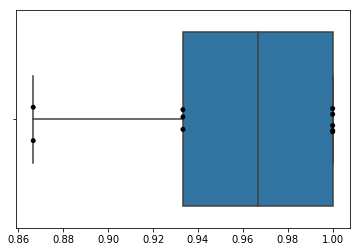

In [34]:
    dt_scores=cross_val_score(decision_tree_classifier,all_inputs,all_labels,cv=10)
sb.boxplot(dt_scores)
sb.stripplot(dt_scores,jitter=True,color='Black')
;

In [35]:
random_forest_classifier=RandomForestClassifier()
parameter_grid={'n_estimators':[10,25,50,100],'criterion':['gini','entropy'],'max_features':[1,2,3,4]}
cross_validation=StratifiedKFold(n_splits=10)
grid_search=GridSearchCV(random_forest_classifier,param_grid=parameter_grid,cv=cross_validation)
grid_search.fit(all_inputs,all_labels)
print('Best Score: {}'.format(grid_search.best_score_))
print('Best Parameters: {}'.format(grid_search.best_params_))
grid_search.best_estimator_

Best Score: 0.9664429530201343
Best Parameters: {'criterion': 'gini', 'max_features': 1, 'n_estimators': 25}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

''

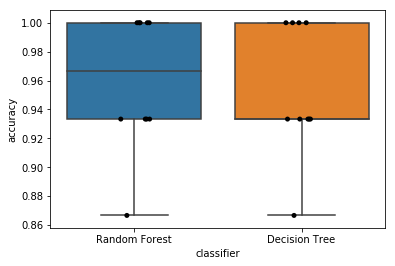

In [36]:
random_forest_classifier=grid_search.best_estimator_
rf_df=pd.DataFrame({'accuracy':cross_val_score(random_forest_classifier,all_inputs,all_labels,cv=10),'classifier':['Random Forest']*10})
dt_df=pd.DataFrame({'accuracy':cross_val_score(decision_tree_classifier,all_inputs,all_labels,cv=10),'classifier':['Decision Tree']*10})
both_df=rf_df.append(dt_df)
sb.boxplot(x='classifier',y='accuracy',data=both_df)
sb.stripplot(x='classifier',y='accuracy',data=both_df,jitter=True,color='Black')
;

[5.4 3.7 1.5]	-->	Iris-setosa	(Actual: Iris-setosa)
[4.4 2.9 1.4]	-->	Iris-setosa	(Actual: Iris-setosa)
[5.5 3.5 1.3]	-->	Iris-setosa	(Actual: Iris-setosa)
[4.9 3.1 1.5]	-->	Iris-setosa	(Actual: Iris-setosa)
[6.3 3.3 4.7]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[6.5 3.  5.8]	-->	Iris-virginica	(Actual: Iris-virginica)
[6.7 3.  5. ]	-->	Iris-virginica	(Actual: Iris-versicolor)
[7.2 3.2 6. ]	-->	Iris-virginica	(Actual: Iris-virginica)
[5.5 2.4 3.7]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[6.7 3.1 4.4]	-->	Iris-versicolor	(Actual: Iris-versicolor)


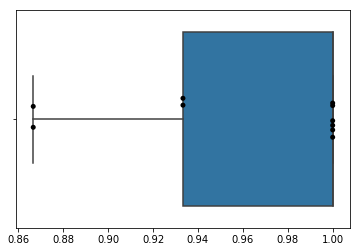

In [37]:
import pandas as pd
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
iris_data_clean=pd.read_csv('iris-data-clean.csv')
assert len(iris_data_clean['class'].unique())==3
assert iris_data_clean.loc[iris_data_clean['class']=='Iris-versicolor','sepal_length_cm'].min()>=2.5
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull())|(iris_data_clean['sepal_width_cm'].isnull())|(iris_data_clean['petal_length_cm'].isnull())|(iris_data_clean['sepal_length_cm'].isnull())])==0
all_inputs=iris_data_clean[['sepal_length_cm','sepal_width_cm','petal_length_cm',]].values
all_labels=iris_data_clean['class'].values
random_forest_classifier=RandomForestClassifier(criterion='gini',max_features=3,n_estimators=50)
rf_classifier_scores=cross_val_score(random_forest_classifier,all_inputs,all_labels,cv=10)
sb.boxplot(rf_classifier_scores)
sb.stripplot(rf_classifier_scores,jitter=True,color='black')
(training_inputs,testing_inputs,training_classes,testing_classes)=train_test_split(all_inputs,all_labels,test_size=0.25)
random_forest_classifier.fit(training_inputs,training_classes)
for input_features,prediction,actual in zip(testing_inputs[:10],random_forest_classifier.predict(testing_inputs[:10]),testing_classes[:10]):
    print('{}\t-->\t{}\t(Actual: {})'.format(input_features,prediction,actual))    